<a href="https://colab.research.google.com/github/Navithaaaa/Calories-Burnt-Prediction/blob/main/Titanic_Prediction_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import and Data Collection

In [ ]:
import pandas as pd
import seaborn as sns
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#DATASET OVERVIEW

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#FEATURE ENGINEERING AND EDA

In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df.groupby(['FamilySize'], as_index= False)['Survived'].agg(['count','mean'])

,FamilySize,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [ ]:
train_df['Fam_type'] = pd.cut(train_df.FamilySize, [0,1,4,7,11], labels=['Solo','Small','Medium','Big'])
test_df['Fam_type'] = pd.cut(test_df.FamilySize,[0,1,4,7,11], labels=['Solo','Small','Medium','Big'])
train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['count','mean'])

<ipython-input-8-6614998b6737>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['count','mean'])


,Fam_type,count,mean
0,Solo,537,0.303538
1,Small,292,0.578767
2,Medium,49,0.204082
3,Big,13,0.000000


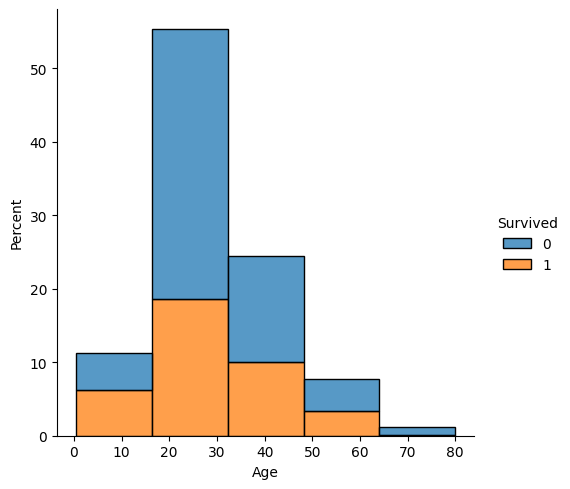

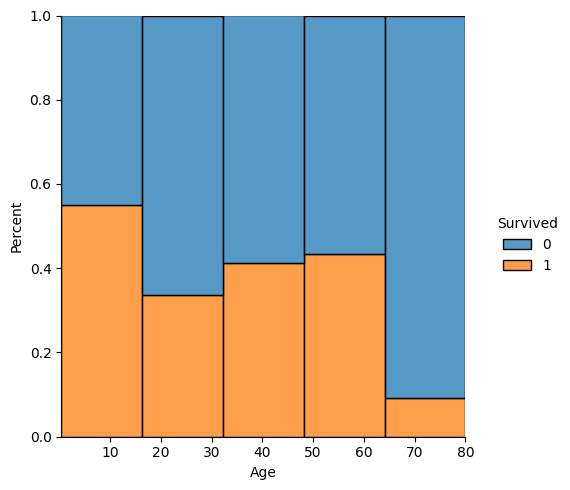

In [ ]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))

sns.displot(train_df,x='Age', hue='Survived',binwidth=17,height=5,multiple='stack',stat='percent')
sns.displot(train_df,x='Age',hue='Survived',binwidth=17,height=5,multiple='fill',stat='percent')

In [ ]:
def encodeAge(train):
  train.loc[train_df['Age'] <= 17,'Age'] = 0
  train.loc[(train_df['Age'] > 17) & (train_df['Age'] <= 32), 'Age'] = 1
  train.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
  train.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
  train.loc[(train_df['Age'] > 64) & (train_df['Age'] <= 80), 'Age'] = 4



In [ ]:
encodeAge(train_df)

In [ ]:
def encodeAge(train_df):
  test.loc[test_df['Age'] <= 17,'Age'] = 0
  test.loc[(test_df['Age'] > 17) & (test_df['Age'] <= 32), 'Age'] = 1
  test.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
  test.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
  test.loc[(test_df['Age'] > 64) & (test_df['Age'] <= 80), 'Age'] = 4


In [ ]:
train_df.groupby(['Age'],as_index=False)['Survived'].mean()

,Age,Survived
0,0.0,0.539823
1,1.0,0.333333
2,2.0,0.412844
3,3.0,0.434783
4,4.0,0.090909


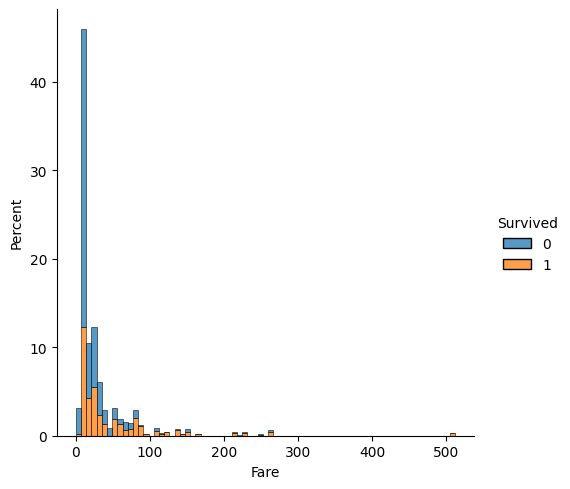

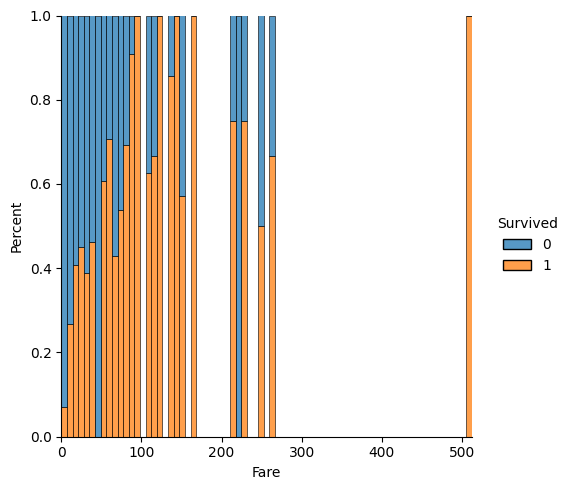

In [ ]:
sns.displot(train_df,x = 'Fare', hue = 'Survived',binwidth=7,height=5,multiple='stack',stat='percent')
sns.displot(train_df,x='Fare',hue='Survived',binwidth=7,height=5,multiple='fill',stat='percent')

In [ ]:
def encodeFare(train):
  train.loc[train_df['Fare'] <= 7,'Fare'] = 0
  train.loc[(train_df['Fare'] > 7) & (train_df['Fare'] <= 14), 'Fare'] = 1
  train.loc[(train_df['Fare'] > 14) & (train_df['Fare'] <= 42.0), 'Fare'] = 2
  train.loc[(train_df['Fare'] > 42.0) & (train_df['Fare'] <= 512.329), 'Fare'] = 3

In [ ]:
encodeFare(train_df)

In [ ]:
def encodeFare(test):
  test.loc[test_df['Fare'] <= 7,'Fare'] = 0
  test.loc[(test_df['Fare'] > 7) & (test_df['Fare'] <= 14), 'Fare'] = 1
  test.loc[(test_df['Fare'] > 14) & (test_df['Fare'] <= 42.0), 'Fare'] = 2
  test.loc[(test_df['Fare'] > 42.0) & (test_df['Fare'] <= 512.329), 'Fare'] = 3

In [ ]:
encodeFare(test_df)

In [ ]:
train_df.groupby(['Fare'],as_index=False)['Survived'].agg(['count','mean'])

,Fare,count,mean
0,0.0000,28,0.071429
1,1.0000,409,0.266504
2,2.0000,282,0.425532
3,3.0000,169,0.639053
4,512.3292,3,1.000000


In [ ]:
#FEATURE EXTRACTION AND STANDARDIZATION

In [ ]:
train_df['Title'] = train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())

In [ ]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [ ]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
train_df['Title'] = train_df['Title'].replace(['Capt','Col','Major','Rev','Dr'],'Officers')
train_df['Title'] = train_df['Title'].replace(['Mrs','Mme'],'Mrs')
train_df['Title'] = train_df['Title'].replace(['Miss','Ms','Mile'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Master'],'Master')
train_df['Title'] = train_df['Title'].replace(['Lady','the Countess','Sir','Jonkheer','Don'],'VIP')
train_df['Title'] = train_df['Title'].replace(['Mr'],'Mr')

test_df['Title'] = test_df['Title'].replace(['Capt','Col','Major','Rev','Dr'],'Officers')
test_df['Title'] = test_df['Title'].replace(['Mrs','Mme'],'Mrs')
test_df['Title'] = test_df['Title'].replace(['Miss','Ms','Mile'],'Miss')
test_df['Title'] = test_df['Title'].replace(['Master'],'Master')
test_df['Title'] = test_df['Title'].replace(['Lady','the Countess','Sir','Jonkheer','Don'],'VIP')
test_df['Title'] = test_df['Title'].replace(['Mr'],'Mr')








In [ ]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,183,0.699454
2,Mlle,2,1.000000
3,Mr,517,0.156673
4,Mrs,126,0.793651
5,Officers,18,0.277778
6,VIP,5,0.600000


In [ ]:
#DATA CLEANING

In [ ]:
train_df.Embarked=train_df.Embarked.fillna(train_df.Embarked.mode()[0])
test_df.Embarked=test_df.Embarked.fillna(test_df.Embarked.mode()[0])

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Fam_type', 'Title'],
      dtype='object')

In [ ]:
train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','FamilySize','Cabin'],inplace=True,axis=1)
test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','FamilySize','Cabin'],inplace=True,axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_type,Title
0,0,3,male,1.0,1.0,S,Small,Mr
1,1,1,female,2.0,3.0,C,Small,Mrs
2,1,3,female,1.0,1.0,S,Solo,Miss
3,1,1,female,2.0,3.0,S,Small,Mrs
4,0,3,male,2.0,1.0,S,Solo,Mr


In [ ]:
#ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])
train_df['Fam_type'] = LabelEncoder().fit_transform(train_df['Fam_type'])
train_df['Title'] = LabelEncoder().fit_transform(train_df['Title'])

In [ ]:
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])
test_df['Embarked'] = LabelEncoder().fit_transform(test_df['Embarked'])
test_df['Fam_type'] = LabelEncoder().fit_transform(test_df['Fam_type'])
test_df['Title'] = LabelEncoder().fit_transform(test_df['Title'])

In [ ]:
#FEATURE SELECTION

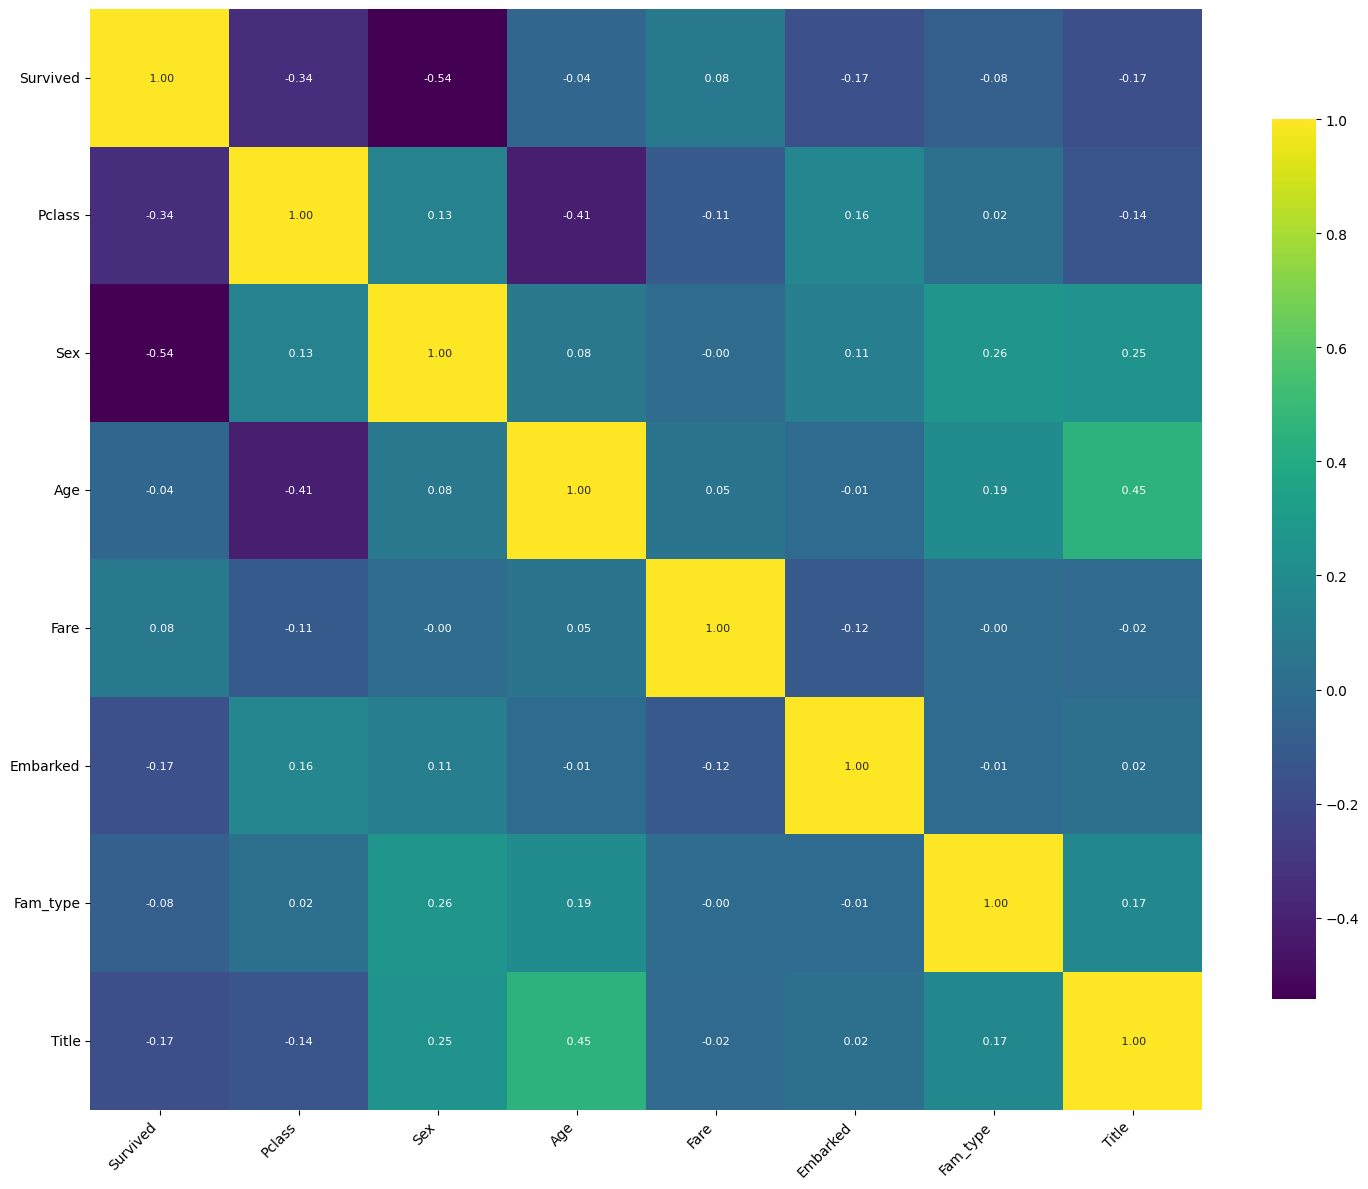

In [ ]:
import matplotlib.pyplot as plt
#Calculate the corelation matrix
correlation_matrix = train_df.corr(numeric_only=True)

#Adjust the figure size and font properties for better readability
plt.figure(figsize=(15,12)) #Increase figure size
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='viridis',
                      fmt=' .2f',
                      annot_kws={'size':8}, #Smaller font size for annotations
                      cbar_kws={'shrink':0.8}) #Shrink color bar size

#Rotate the x and y labels for better readability
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(rotation=0,fontsize=10)

plt.tight_layout() #Adjust layout for better fit
plt.show()

In [ ]:
train_df = train_df.loc[:,['Survived','Pclass','Sex','Embarked','Age','Fare','Fam_type','Title']]
test_df = test_df.loc[:,['Pclass','Sex','Embarked','Age','Fare','Fam_type','Title']]

In [ ]:
#DATA SPLITTING,MODEL SELECTION AND TRAINING

In [ ]:
X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [ ]:
#MODEL EVALUATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,n_estimators=200)

rf_model = rfc.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

from sklearn.metrics import classification_report #Fare and removed
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

